## How to Hack Your Dating App

Group members: Alison Picerno, Simone Ritcheson, Arielle Greenberg, Vivian Weigel

In [1]:
#import all the necessary packages
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

/Users/vivianweigel/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Here is the link to our dataset ['Dating App User Profiles' stats - Lovoo v3'](https://www.kaggle.com/datasets/jmmvutu/dating-app-lovoo-user-profiles)

In [2]:
# read in data and look at head to get a sense of data
df = pd.read_csv('lovoo_users.csv')
df.head()

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,shareProfileEnabled,lastOnlineDate,lastOnlineTime,birthd,crypt,freetext,whazzup,userId,pictureId,isSystemProfile
0,F,M,25,daeni,1.00,4,8279,239,0,3,...,1,2015-04-25T20:43:26Z,1.429995e+09,0,NaN,Nur tote Fisch schwimmen mit dem Strom,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,NaN
1,F,M,22,italiana 92,0.85,5,663,13,0,0,...,1,2015-04-26T09:19:35Z,1.430040e+09,0,NaN,NaN,Primaveraaa<3,4e3d34bf5d2bce7b160006a3,552e7b61c66da10d1e8b4c82,NaN
2,F,M,21,Lauraaa,0.00,4,1369,88,0,2,...,1,2015-04-06T14:24:07Z,1.428330e+09,0,NaN,NaN,NaN,4ec96c090dc82cb25d00000a,54a584ecc56da128638b4674,NaN
3,F,none,20,Qqkwmdowlo,0.12,3,22187,1015,2,3,...,1,2015-04-07T11:21:01Z,1.428406e+09,0,NaN,NaN,Je pense donc je suis. Instagram quedev,4eef8b81ebf2c8f64000000c,54c92738076ea1b5338b4735,NaN
4,F,M,21,schaessie {3,0.15,12,35262,1413,9,12,...,1,2015-04-06T14:25:20Z,1.428330e+09,0,NaN,NaN,Instagram: JESSSIESCH,4ef3cc5aa9d0b3d07d000017,54e1a6f6c76da135748b4a3a,NaN


## Perform EDA and Data Preparation

In [3]:
# look at types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3992 entries, 0 to 3991
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  3992 non-null   object 
 1   genderLooking           3992 non-null   object 
 2   age                     3992 non-null   int64  
 3   name                    3992 non-null   object 
 4   counts_details          3992 non-null   float64
 5   counts_pictures         3992 non-null   int64  
 6   counts_profileVisits    3992 non-null   int64  
 7   counts_kisses           3992 non-null   int64  
 8   counts_fans             3992 non-null   int64  
 9   counts_g                3992 non-null   int64  
 10  flirtInterests_chat     3992 non-null   bool   
 11  flirtInterests_friends  3992 non-null   bool   
 12  flirtInterests_date     3992 non-null   bool   
 13  country                 3992 non-null   object 
 14  city                    3706 non-null   

There are some invalid datatypes, so let's begin by converting the necessary columns to valid datatypes. 

In [4]:
# change invalid types 
df['gender']  = df['gender'].astype(str)
df['genderLooking']  = df['genderLooking'].astype(str)
df['country']  = df['country'].astype(str)
df['city']  = df['city'].astype(str)
df['location']  = df['location'].astype(str)
df['name']  = df['name'].astype(str)
df['freetext']  = df['freetext'].astype(str)
df['whazzup']  = df['whazzup'].astype(str)
df['userId']  = df['userId'].astype(str)
df['pictureId']  = df['pictureId'].astype(str)

Now, let's analyze the percentage of missing values in each column.

In [5]:
# find the percentage of null values each colum
df.isnull().mean()*100

gender                     0.000000
genderLooking              0.000000
age                        0.000000
name                       0.000000
counts_details             0.000000
counts_pictures            0.000000
counts_profileVisits       0.000000
counts_kisses              0.000000
counts_fans                0.000000
counts_g                   0.000000
flirtInterests_chat        0.000000
flirtInterests_friends     0.000000
flirtInterests_date        0.000000
country                    0.000000
city                       0.000000
location                   0.000000
distance                   1.152305
isFlirtstar                0.000000
isHighlighted              0.000000
isInfluencer               0.000000
isMobile                   0.000000
isNew                      0.000000
isOnline                   0.000000
isVip                      0.000000
lang_count                 0.000000
lang_fr                    0.000000
lang_en                    0.000000
lang_de                    0

The columns 'isSystemProfile' and 'crypt' both have high percentages of missing data, so we decided to drop these columns as we do not plan on utilizing them during our machine learning algorithms.

In [6]:
# drop columns with very high percentages of missing data
df = df.drop(['isSystemProfile'], axis=1)
df = df.drop(['crypt'], axis=1)

Since distance has 1.15% of missing values, let's perform imputation and replace the missing values with the mean distance.

In [7]:
# find mean distance
df['distance'].mean()

# replace null values with mean
df.loc[df["distance"].isnull(), "distance"] = df['distance'].mean()

Since the columns 'lastOnlineDate' and 'lastOnlineTime' have some missing values, lets perform imputation and replace them with their most common value.

In [8]:
# find most common dates
df['lastOnlineDate'].value_counts()

2015-04-07T00:08:59Z    7
2015-04-06T14:23:52Z    7
2015-04-19T08:37:52Z    6
2015-04-05T07:13:49Z    6
2015-04-06T16:02:55Z    5
                       ..
2015-04-06T16:03:19Z    1
2015-04-26T09:37:25Z    1
2015-04-26T11:41:36Z    1
2015-04-19T23:59:22Z    1
2015-04-19T11:00:59Z    1
Name: lastOnlineDate, Length: 3470, dtype: int64

In [9]:
# replace null values with common date
df.loc[df["lastOnlineDate"].isnull(), "lastOnlineDate"] = '2015-04-07T00:08:59Z'

In [10]:
# find most common time
df['lastOnlineTime'].value_counts()

1.428365e+09    7
1.428330e+09    7
1.429433e+09    6
1.428218e+09    6
1.428336e+09    5
               ..
1.428336e+09    1
1.430041e+09    1
1.430048e+09    1
1.429488e+09    1
1.429441e+09    1
Name: lastOnlineTime, Length: 3470, dtype: int64

In [11]:
# replace null values with common time
df.loc[df["lastOnlineTime"].isnull(), "lastOnlineTime"] = 1.428365e+09

In [12]:
# we can see that all null values are gone
df.isnull().mean()*100

gender                    0.0
genderLooking             0.0
age                       0.0
name                      0.0
counts_details            0.0
counts_pictures           0.0
counts_profileVisits      0.0
counts_kisses             0.0
counts_fans               0.0
counts_g                  0.0
flirtInterests_chat       0.0
flirtInterests_friends    0.0
flirtInterests_date       0.0
country                   0.0
city                      0.0
location                  0.0
distance                  0.0
isFlirtstar               0.0
isHighlighted             0.0
isInfluencer              0.0
isMobile                  0.0
isNew                     0.0
isOnline                  0.0
isVip                     0.0
lang_count                0.0
lang_fr                   0.0
lang_en                   0.0
lang_de                   0.0
lang_it                   0.0
lang_es                   0.0
lang_pt                   0.0
verified                  0.0
shareProfileEnabled       0.0
lastOnline

# Machine Learning
For the machine learning portion of our project, we decided to utilize Random Forest Regression, Random Forest Classification, Simple Linear Regression, Random Forest Feature Importance, and K-NN classifier. For more information on why we chose algorithms, refer to our poster.

It is important to note that instead of using all 42 columns of the dataset as a different variable in our machine learning algorithms, we decided to only focus on a select few that we felt would be the most impactful on our model.  The metric we will be testing on is the number of likes (aka “count_kisses”) that a profile (represented by a row in the dataset) receives, and we ultimately aim to analyze the relationship between the following factors and the number of likes. We decided to choose user age, count of pictures on profile, count of profile visits, count of fans, isOnline (a categorical variable represented by 0 or 1 for ‘yes’ or ‘no’), verified (another categorical variable with values ‘yes’ or ‘no’, thus we will need to perform encoding), and finally distance. 

As stated in the brief summary above, we must first begin by isolating the columns we are focusing on in all of our machine learning algorithms. 

In [13]:
#create new dataframe with columns we care about
new_df = df[['counts_kisses', 'age', 'counts_pictures', 'counts_profileVisits',
            'counts_fans', 'isOnline', 'verified', 'distance']].copy()


We decided to do a 70/30 split when partitioning the data for all of our machine learning algorithms.

In [14]:
#partition the data
X   = new_df[['age', 'counts_pictures', 'counts_profileVisits',
            'counts_fans', 'isOnline', 'verified', 'distance']] #get the input features
y   = new_df['counts_kisses']              #get the target

X_train, X_test, y_train, y_test = train_test_split(X,              #the input features
                                                    y,              #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7 #reproduce the results
                                                   )

In [15]:
X_train = X_train.copy()
X_test  = X_test.copy()

Note that 'verfied' is a categorical feature, thus we must encode it for our algorithms. 

In [16]:
#encode the categorical feature
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore') #drop one of the encoded verified columns
encoder.fit(X_train[['verified']])
#enc.categories_ #view the categories

X_train['verified'] = encoder.transform(X_train[['verified']])



In [17]:
#double check that its encoded
X_train.head()

,age,counts_pictures,counts_profileVisits,counts_fans,isOnline,verified,distance
3609,25,2,5580,2,0,0.0,2.4
270,25,20,10553,1,1,1.0,80.2
170,21,3,3075,15,0,1.0,138.0
3164,24,1,230,0,1,1.0,429.0
2747,19,4,488,0,0,1.0,103.0


## Random Forest

We decided to utilize random forest regression, classification, and feature importance to avoid overfitting the data and to determine the magnititude of the effect different profile features have on the counts of kisses.

#### Random Forest Regression
Let's begin by running a random forest regression to first analyze the mean square error of our random forest model.

In [18]:
#run the random forest regressor
rf = RandomForestRegressor(random_state=7)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=7)

In [19]:
#predict the labels for the test set
y_pred   = rf.predict(X_test)

print('The predicted count of kisses is: {}'.format(y_pred))

The predicted count of kisses is: [200.58   0.     2.01 ...   4.2    2.91  30.51]


In [20]:
mse = mean_squared_error(y_test, y_pred)

# Evaluate the Predictions
print('The mse of the model is: {}'.format(mse))
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print('counts_kisses', 'r2 score:', r2)


The mse of the model is: 26127.88161068447
counts_kisses r2 score: 0.7568781276988309


The mean square error is quite high, suggesting that the average distance between the observed and predicted counts of kisses is over 26,000. However, the r2 score is .7568, which suggests that 75.68% of the change in counts_kisses is attributed to the change in our X features. This is quite high! Let's see how well our other random forest models perform. 

### Tuning Hyperparameters  - Random Forest Regression and Feature Importance 
We will now use GridSearchCV to tune two hyperparameters in this model.

We utilized this [source](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74) for assistance.

In [21]:
from sklearn.model_selection import GridSearchCV

#define the parameter grid

param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 75, 100],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [4, 6, 8],
    'n_estimators': [50, 100, 200]
}

# Create a based model
rf = RandomForestRegressor(random_state=7)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
print(grid_search.best_params_)


# Get the best estimator
best_rf = grid_search.best_estimator_

# Evaluate the best estimator on the test set
test_accuracy = best_rf.score(X_test, y_test)

# Print the improvement over the baseline model
base_rf = RandomForestRegressor(random_state=7)
base_rf.fit(X_train, y_train)
base_accuracy = base_rf.score(X_test, y_test)
print('Improvement of {:0.2f}%.'.format(100 * (test_accuracy - base_accuracy) / base_accuracy))

Fitting 3 folds for each of 162 candidates, totalling 486 fits
{'bootstrap': True, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100}
Improvement of 4.96%.


### Interpreting the hyperparameter results
This means that the best model found had the following hyperparameters:

bootstrap: True, meaning bootstrap samples were used when building trees.
max_depth: 50, which sets the maximum depth of the tree.
max_features: 'sqrt', which sets the maximum number of features to consider when splitting a node to the square root of the number of features.
min_samples_leaf: 2, which sets the minimum number of samples required to be at a leaf node.
min_samples_split: 6, which sets the minimum number of samples required to split an internal node.
n_estimators: 100, which sets the number of trees in the forest.

Finally, the output shows that the model with these hyperparameters has an improvement of 4.96% over the baseline model. This means that the best model found by the grid search performs 4.96% better on the test set than the default model with the default hyperparameters.

In [22]:
#now, let's implement the changes into our model
best_rf = RandomForestRegressor(bootstrap=True, max_depth=50, max_features='sqrt',
                                 min_samples_leaf=2, min_samples_split=6, n_estimators=100, 
                                 random_state=7)

# Fit the model to the training set
best_rf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = best_rf.predict(X_test)

# Compute the mean squared error and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: {:.2f}".format(mse))
print("R2 score: {:.2f}".format(r2))



Mean squared error: 22092.12
R2 score: 0.79


This decreased our mean squared error and increased our R2 score quite significantly. This was successful hypertuning. Now, these tuned hyperparameters will be applied to our random forest feature importance model as it builds off of our random forest regressor.

#### Random Forest Feature Importance
Let's see which features are the most impactful on our model. We're curious to see which profile features contribute the most to a change in counts of kisses. 

In [23]:
# find the importances
fi= best_rf.feature_importances_

feats = X.columns.tolist()
feats = np.array(feats)

In [24]:
#create a chart that shows users the importance of each feature
cdf = pd.DataFrame(fi, feats, columns=['Importance'])
print(cdf)

                      Importance
age                     0.027979
counts_pictures         0.099498
counts_profileVisits    0.729654
counts_fans             0.047533
isOnline                0.008560
verified                0.010704
distance                0.076072


Text(0.5, 1.0, 'Feature Importance for Count of Kisses')

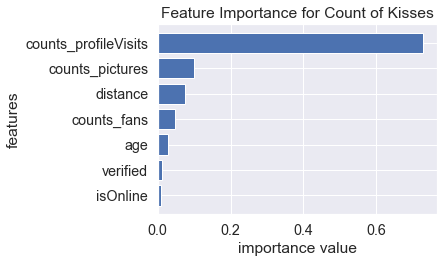

In [25]:
idx = np.argsort(fi).astype(int)
feats = [feats[_idx] for _idx in idx]
fi = fi[idx]

sns.set(font_scale=1.3)

plt.barh(feats, fi)
plt.gcf().set_size_inches(5, len(feats) / 2)
plt.xlabel('importance value')
plt.ylabel('features')
plt.title('Feature Importance for Count of Kisses')

The feature importance indicates the magnitude of the effect each feature has on the number of profile likes or 'kisses'. The number of profile visits has the largest, most significant effect on the amount of kisses, shown by its very large, positive importance.

#### Random Forest Classification
While the random forest regressor is quite helpful with continous, numerical data, it's at times not as easy to interpret. We decided to also utilize random forest classification and separate the count of kisses into bins titled high, medium, and low, to better analyze the models accuracy, precision, and recall when predicting counts of kisses. We chose to split the counts of kisses into three bins to see if there was any major discrepancy in the model based on the magnititude of kisses.  

We must begin by actually creating the bins. After analyzing the data, we decided that the best way to split up the data into three bins was to put counts of kisses above 141 into the 'high' bin, counts of less than 11 into the 'low' bin, and everything else into the 'medium' bin. We felt this most fairly and accurately split up the data.

In [26]:
#create bins
cats = []
for i in new_df['counts_kisses']:
    if i > 141: 
        cats.append('high')
    elif i < 11:
        cats.append('low')
    else: 
        cats.append('medium')
new_df['target'] = cats

Now, we have to partition the data once again since we have a new target column.

In [27]:
#partition the data
X   = new_df[['age', 'counts_pictures', 'counts_profileVisits',
            'counts_fans', 'isOnline', 'verified', 'distance']] #get the input features
y   = new_df['target']              #get the target

X_train, X_test, y_train, y_test = train_test_split(X,              #the input features
                                                    y,              #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7 #reproduce the results
                                                   )

In [28]:
X_train = X_train.copy()
X_test  = X_test.copy()

#encode the categorical feature
#encode the categorical feature verified
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore') #drop one of the encoded verified columns
encoder.fit(X_train[['verified']])
#enc.categories_ #view the categories

X_train['verified'] = encoder.transform(X_train[['verified']])


In [29]:
#build the classifier
rfc = RandomForestClassifier(criterion='entropy', n_estimators = 50, random_state = 7)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=7)

In [30]:
#predict the labels for the test set
y_pred   = rfc.predict(X_test)

# Prediction accuracy
print('The accuracy of the model is: {}'.format(rfc.score(X_test, y_test)))

The accuracy of the model is: 0.8021702838063439


In [31]:
#get the classification report for the decision tree
y_pred = rfc.predict(X_test)

target_names = ['high', 'medium', 'low']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

        high       0.83      0.78      0.81       290
      medium       0.75      0.77      0.76       268
         low       0.81      0.82      0.82       640

    accuracy                           0.80      1198
   macro avg       0.80      0.79      0.80      1198
weighted avg       0.80      0.80      0.80      1198



High: A precision value of .83 tells us that 83% of the predictions were true positives, and 13% of the predicitions were false positive; i.e, the model incorrectly deemed 13% of the items as having high counts of kisses when in actuality they were not. A recall value of .78 tells us that our model correctly identified 78% of true high kiss counts items as having high kiss counts.

Medium: A precision value of .75 tells us that 75% of the predictions were true positives, and 25% of the predicitions were false positive; i.e, the model incorrectly deemed 25% of the items as having medium kiss counts when in actuality they were not. A recall value of .77 tells us that our model correctly identified 77% of true medium kiss counts items as medium kiss counts.

Low: A precision value of .81 tells us that 81% of the predictions were true positives, and 19% of the predicitions were false positive; i.e, the model incorrectly deemed 19% of the items as low kiss counts when in actuality they were not. A recall value of .82 tells us that our model correctly identified 82% of true low kiss counts items as having low kiss counts.

Overall, this model seems to work very well, and seems to perform the best with items in the high kiss count bin and worse with the medium kiss count bin. We will discuss the results further in our poster, but this model is very promising.

### Tuning Hyperparameters - Random Forest Classifier
Now, let's perform tuning hyperparameters for our random forest classifier model. 

In [32]:
#define the parameter grid 
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 25, None],
    'min_samples_split': [2, 6],
    'min_samples_leaf': [1, 4],
    'max_features': ['sqrt', None],
    'bootstrap': [True, False]
}

# Create a random forest classifier
rfc = RandomForestClassifier(random_state=7)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

#modify the code with the best hyperparameters found
best_params = grid_search.best_params_

# build the random forest classifier using the best hyperparameters
best_rfc = RandomForestClassifier(random_state=7, **best_params)
best_rfc.fit(X_train, y_train)

# predict the labels for the test set
y_pred = best_rfc.predict(X_test)


Fitting 3 folds for each of 96 candidates, totalling 288 fits


In [33]:
# print the prediction accuracy
print('The accuracy of the model is: {}'.format(best_rfc.score(X_test, y_test)))

# get the classification report for the decision tree
target_names = ['high', 'medium', 'low']

print(classification_report(y_test, y_pred, target_names=target_names))

The accuracy of the model is: 0.8138564273789649
              precision    recall  f1-score   support

        high       0.85      0.77      0.81       290
      medium       0.80      0.75      0.77       268
         low       0.81      0.86      0.83       640

    accuracy                           0.81      1198
   macro avg       0.82      0.79      0.80      1198
weighted avg       0.81      0.81      0.81      1198



The accuracy for this new model with the tuned hyperparameters is now .81, thus it only improved our original models accuracy by .01. The precision vaues for high and medium bins went up, while the precision value for low stayed the same. The recall values went down for high and medium, yet went up for low. 

Based on these results, the changes did not improve our model by a significant amount. 

## K-NN Classifer

We also want to explore knn classification to create clusters of online dating profiles and determine if our model can pick out important similarities between profiles

Since we are going to be using the same bins as the random forest classifier, we don't need to revert to the original data just yet. 

In [34]:
# building the classifier
print((y_train))
knn = KNeighborsClassifier(n_neighbors = 65) #initialize the classifier and set the number of neighbors
knn.fit(X_train, y_train)

3609      high
270       high
170     medium
3164    medium
2747    medium
         ...  
1603    medium
2550    medium
537       high
1220    medium
175       high
Name: target, Length: 2794, dtype: object


KNeighborsClassifier(n_neighbors=65)

In [35]:
#predict the labels for the test set
y_pred   = knn.predict(X_test)

print('The predicted BMI is: {}'.format(y_pred))
# Prediction accuracy
print('The accuracy of the model is: {}'.format(knn.score(X_test, y_test)))

The predicted BMI is: ['high' 'low' 'low' ... 'low' 'low' 'medium']
The accuracy of the model is: 0.8121869782971619


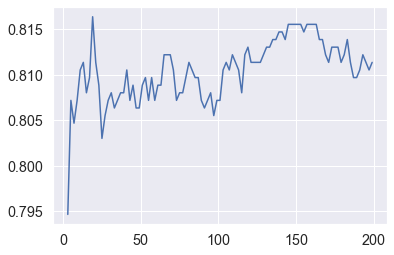

Optimal k value: 19


In [36]:
#identify a suitable value of k
predictions = {}

for k in range(3, 200, 2): #increment k by 2
    knn = KNeighborsClassifier(n_neighbors = k) #initialize the classifier and set the number of neighbors
    knn.fit(X_train, y_train)
    predictions[k] = knn.score(X_test, y_test)
sns.lineplot(x=predictions.keys(), y=predictions.values())
plt.show()
print('Optimal k value:', max(predictions, key = predictions.get))

The K-NN model has an accuracy of .81 which is quite high, suggesting this model is good. The optimal k value is 19, suggesting that the best number of neighbors is 19. 

### Tuning HyperParameters - KNN Classifier

Even though we already performed action that found the best k-value, we are also going to perform tuning of the hyperparameters as we did with the other models. 

In [37]:
# Define the parameter grid to search over
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 12, 16, 19, 50]}

# Create a K-NN classifier
knn = KNeighborsClassifier()

# Use GridSearchCV to search over the parameter grid
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 19}
Best score: 0.84


This verifies our conclusion that a k value of 19 was the best for our model, with the highest score of .84. 

# SVC Model
The SVC model is the third classifier model we are running. The same data that was used for the knn classifier can be utilized for this model.

In [38]:
# Define the SVM model
svm = SVC()

# Define the hyperparameter grid to search over
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 'scale', 'auto']
}

# Create a GridSearchCV object and fit the training data
grid_search = GridSearchCV(svm, param_grid, cv=5, return_train_score = True)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Evaluate the model on the training set and test set
print("Training set score: ", grid_search.score(X_train, y_train))
print("Test set score: ", grid_search.score(X_test, y_test))

#display the cv results for the train and test set
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending=False)
cv_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']].head()

Best parameters:  {'C': 10, 'gamma': 'scale'}
Best score:  0.8328505203223882
Training set score:  0.8342877594846099
Test set score:  0.8055091819699499


,mean_train_score,std_train_score,mean_test_score,std_test_score
10,0.834735,0.002644,0.832851,0.013155
6,0.829814,0.003081,0.829630,0.013428
2,0.705174,0.051059,0.699336,0.052677
8,1.000000,0.000000,0.522190,0.005889
11,1.000000,0.000000,0.517536,0.005231


## Simple Linear Regression

Let's revert back to the original data without the bins. 

In [39]:
new_df = df[['counts_kisses', 'age', 'counts_pictures', 'counts_profileVisits',
            'counts_fans', 'isOnline', 'verified', 'distance']].copy()
#partition the data
X   = new_df[['age', 'counts_pictures', 'counts_profileVisits',
            'counts_fans', 'isOnline', 'verified', 'distance']] #get the input features
y   = new_df['counts_kisses']              #get the target

X_train, X_test, y_train, y_test = train_test_split(X,              #the input features
                                                    y,              #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7 #reproduce the results
                                                   )
X_train = X_train.copy()
X_test  = X_test.copy()

#encode the categorical feature
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore') #drop one of the encoded verified columns
encoder.fit(X_train[['verified']])
#enc.categories_ #view the categories

X_train['verified'] = encoder.transform(X_train[['verified']])




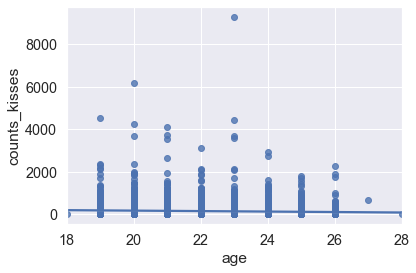

In [40]:
#Lets visualize this data again and show the trend line
sns.regplot(data=new_df, x='age', y='counts_kisses') #display the trend line using regplot
plt.show()

In [41]:
# simple linear regression for kisses x age 
from sklearn.linear_model import LinearRegression
import numpy as np

# code from class

X = new_df['age'].to_numpy() #get the explanatory variable
X = X.reshape(-1, 1)

y = new_df['counts_kisses'].to_numpy()  #get the response variable
y = y.reshape(-1, 1)

lr_model_1 = LinearRegression(fit_intercept=True) #initialize the regression model
lr_model_1 = lr_model_1.fit(X, y)                   #fit the data to the model i.e. find the line of best fit

#display the parameters for the slope and intercept
print('The intercept is: ', lr_model_1.intercept_[0])
print('The slope is: ', lr_model_1.coef_[0,0])

The intercept is:  400.4689735143315
The slope is:  -11.089260078245944


In [42]:
#get r-squared, i.e. the coefficient of determination
r_sqrd = lr_model_1.score(X, y)
r_sqrd = round(r_sqrd, 5)

print('r-squared for the kisses and age slr is: ', r_sqrd)

r-squared for the kisses and age slr is:  0.00331


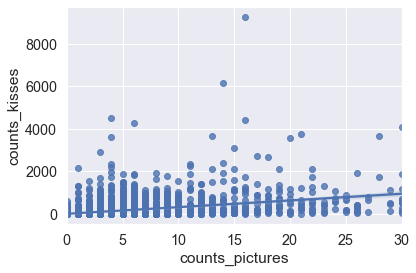

In [43]:
#Lets visualize this data again and show the trend line
sns.regplot(data=new_df, x='counts_pictures', y='counts_kisses') #display the trend line using regplot
plt.show()

In [44]:
# simple linear regression for kisses x count of pictures  
from sklearn.linear_model import LinearRegression
import numpy as np

# code from class

X = new_df['counts_pictures'].to_numpy() #get the explanatory variable
X = X.reshape(-1, 1)

y = new_df['counts_kisses'].to_numpy()  #get the response variable
y = y.reshape(-1, 1)

lr_model_2 = LinearRegression(fit_intercept=True) #initialize the regression model
lr_model_2 = lr_model_2.fit(X, y)                   #fit the data to the model i.e. find the line of best fit

#display the parameters for the slope and intercept
print('The intercept is: ', lr_model_2.intercept_[0])
print('The slope is: ', lr_model_2.coef_[0,0])

The intercept is:  6.082856507122301
The slope is:  31.445637263113237


In [45]:
#get r-squared, i.e. the coefficient of determination
r_sqrd = lr_model_2.score(X, y)
r_sqrd = round(r_sqrd, 5)

print('r-squared for the kisses and counts of pictures slr is: ', r_sqrd)

r-squared for the kisses and counts of pictures slr is:  0.13547


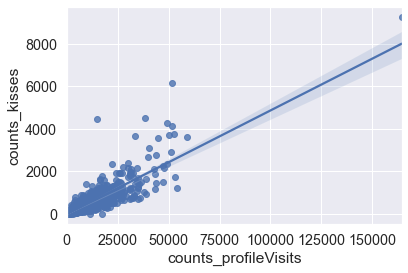

In [46]:
#Lets visualize this data again and show the trend line
sns.regplot(data=new_df, x='counts_profileVisits', y='counts_kisses') #display the trend line using regplot
plt.show()

In [47]:
# simple linear regression for kisses x count of profile visits   
from sklearn.linear_model import LinearRegression
import numpy as np

# code from class

X = new_df['counts_profileVisits'].to_numpy() #get the explanatory variable
X = X.reshape(-1, 1)

y = new_df['counts_kisses'].to_numpy()  #get the response variable
y = y.reshape(-1, 1)

lr_model_3 = LinearRegression(fit_intercept=True) #initialize the regression model
lr_model_3 = lr_model_3.fit(X, y)                   #fit the data to the model i.e. find the line of best fit

#display the parameters for the slope and intercept
print('The intercept is: ', lr_model_3.intercept_[0])
print('The slope is: ', lr_model_3.coef_[0,0])

The intercept is:  -24.45246263624449
The slope is:  0.04886081916979278


In [48]:
#get r-squared, i.e. the coefficient of determination
r_sqrd = lr_model_3.score(X, y)
r_sqrd = round(r_sqrd, 5)

print('r-squared for the kisses and counts of profile visits slr is: ', r_sqrd)

r-squared for the kisses and counts of profile visits slr is:  0.78432


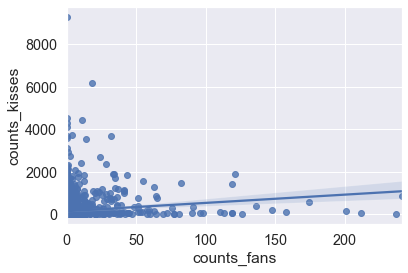

In [49]:
#Lets visualize this data again and show the trend line
sns.regplot(data=new_df, x='counts_fans', y='counts_kisses') #display the trend line using regplot
plt.show()

In [50]:
# simple linear regression for kisses x count of fans  
from sklearn.linear_model import LinearRegression
import numpy as np

# code from class

X = new_df['counts_fans'].to_numpy() #get the explanatory variable
X = X.reshape(-1, 1)

y = new_df['counts_kisses'].to_numpy()  #get the response variable
y = y.reshape(-1, 1)

lr_model_4 = LinearRegression(fit_intercept=True) #initialize the regression model
lr_model_4 = lr_model_3.fit(X, y)                   #fit the data to the model i.e. find the line of best fit

#display the parameters for the slope and intercept
print('The intercept is: ', lr_model_4.intercept_[0])
print('The slope is: ', lr_model_4.coef_[0,0])

The intercept is:  147.55113479405338
The slope is:  3.8744899605426264


In [51]:
#get r-squared, i.e. the coefficient of determination
r_sqrd = lr_model_4.score(X, y)
r_sqrd = round(r_sqrd, 5)

print('r-squared for the kisses and counts of pictures slr is: ', r_sqrd)

r-squared for the kisses and counts of pictures slr is:  0.01576


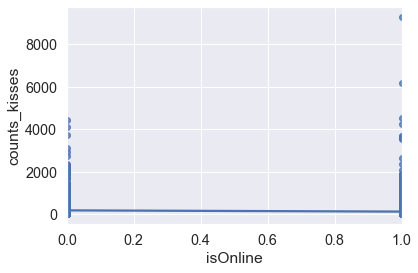

In [52]:
#Lets visualize this data again and show the trend line
sns.regplot(data=new_df, x='isOnline', y='counts_kisses') #display the trend line using regplot
plt.show()

In [53]:
# simple linear regression for kisses x is Online  
from sklearn.linear_model import LinearRegression
import numpy as np

# code from class

X = new_df['isOnline'].to_numpy() #get the explanatory variable
X = X.reshape(-1, 1)

y = new_df['counts_kisses'].to_numpy()  #get the response variable
y = y.reshape(-1, 1)

lr_model_5 = LinearRegression(fit_intercept=True) #initialize the regression model
lr_model_5 = lr_model_5.fit(X, y)                   #fit the data to the model i.e. find the line of best fit

#display the parameters for the slope and intercept
print('The intercept is: ', lr_model_5.intercept_[0])
print('The slope is: ', lr_model_5.coef_[0,0])

The intercept is:  190.28157099697887
The slope is:  -57.53445931533576


In [54]:
#get r-squared, i.e. the coefficient of determination
r_sqrd = lr_model_5.score(X, y)
r_sqrd = round(r_sqrd, 5)

print('r-squared for the kisses and isOnline slr is: ', r_sqrd)

r-squared for the kisses and isOnline slr is:  0.00563


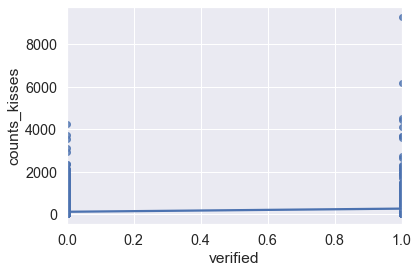

In [55]:
#Lets visualize this data again and show the trend line
sns.regplot(data=new_df, x='verified', y='counts_kisses') #display the trend line using regplot
plt.show()

In [56]:
# simple linear regression for kisses x is Online  
from sklearn.linear_model import LinearRegression
import numpy as np

# code from class

X = new_df['verified'].to_numpy() #get the explanatory variable
X = X.reshape(-1, 1)

y = new_df['counts_kisses'].to_numpy()  #get the response variable
y = y.reshape(-1, 1)

lr_model_6 = LinearRegression(fit_intercept=True) #initialize the regression model
lr_model_6 = lr_model_6.fit(X, y)                   #fit the data to the model i.e. find the line of best fit

#display the parameters for the slope and intercept
print('The intercept is: ', lr_model_6.intercept_[0])
print('The slope is: ', lr_model_6.coef_[0,0])

The intercept is:  123.8564547206166
The slope is:  148.87361361651313


In [57]:
#get r-squared, i.e. the coefficient of determination
r_sqrd = lr_model_6.score(X, y)
r_sqrd = round(r_sqrd, 5)

print('r-squared for the kisses and verified slr is: ', r_sqrd)

r-squared for the kisses and verified slr is:  0.02667


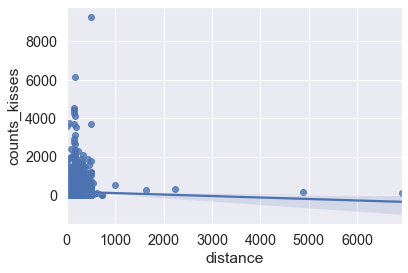

In [58]:
#Lets visualize this data again and show the trend line
sns.regplot(data=new_df, x='distance', y='counts_kisses') #display the trend line using regplot
plt.show()

In [59]:
new_df['distance'].value_counts

<bound method IndexOpsMixin.value_counts of 0       175.000000
1       138.000000
2       137.000000
3        77.300000
4       286.000000
           ...    
3987    207.230005
3988    207.230005
3989    207.230005
3990    207.230005
3991    207.230005
Name: distance, Length: 3992, dtype: float64>

In [60]:
# simple linear regression for kisses x is Online  
from sklearn.linear_model import LinearRegression
import numpy as np

# code from class

X = new_df['distance'].to_numpy() #get the explanatory variable
X = X.reshape(-1, 1)

y = new_df['counts_kisses'].to_numpy()  #get the response variable
y = y.reshape(-1, 1)

lr_model_7 = LinearRegression(fit_intercept=True) #initialize the regression model
lr_model_7 = lr_model_7.fit(X, y)                   #fit the data to the model i.e. find the line of best fit

#display the parameters for the slope and intercept
print('The intercept is: ', lr_model_7.intercept_[0])
print('The slope is: ', lr_model_7.coef_[0,0])

The intercept is:  172.53642724741292
The slope is:  -0.0769035731256837


In [61]:
#get r-squared, i.e. the coefficient of determination
r_sqrd = lr_model_7.score(X, y)
r_sqrd = round(r_sqrd, 5)

print('r-squared for the kisses and distance slr is: ', r_sqrd)

r-squared for the kisses and distance slr is:  0.00158


### Tuning Hyperparameters - Simple Linear Regression
Considering lr_model_3 had the best r2 score, we will be tuning the hyperparameters for this model only.

In [62]:
# Define the parameter grid
param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False]
}

# only use lr_model_3
# simple linear regression for kisses x count of profile visits   
X = new_df['counts_profileVisits'].to_numpy() #get the explanatory variable
X = X.reshape(-1, 1)

y = new_df['counts_kisses'].to_numpy()  #get the response variable
y = y.reshape(-1, 1)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=lr_model_3, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best hyperparameters found
best_params = grid_search.best_params_

# Build the linear regression model using the best hyperparameters
lr_model_3 = LinearRegression(**best_params)
lr_model_3.fit(X, y)




Fitting 3 folds for each of 8 candidates, totalling 24 fits


LinearRegression(fit_intercept=False, normalize=True)

In [63]:
# Print the new r_sqrd
r_sqrd = lr_model_3.score(X, y)
r_sqrd = round(r_sqrd, 5)
print('The new r-squared for the profile visits and kissesis: ', r_sqrd)



The new r-squared for the profile visits and kissesis:  0.78108


This tuning of hyperparameters overfitted the model as our r-squared score actually went dow by .03.